<a href="https://colab.research.google.com/github/sahada19/AIMS_project_code/blob/master/THESIS_CAPM_CODE_LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CAPM - SIMPLE LINEAR REGRESSION MODEL USING SCIKIT LEARN**



Importation of libraries

In [ ]:
import math
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import numpy.random as nr
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
from scipy import stats
import statsmodels.api as sm
import sklearn.metrics as sklm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [ ]:
####install yfinance to download stock data
!pip3 install yfinance --upgrade 

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.54)


Data preprocessing

In [ ]:
#####download the datasets########
import yfinance as yf
dta1=yf.download ("AAPL",start="2000-01-01",end="2019-12-31") #download the data for Apple
dta2=yf.download ("^GSPC",start="2000-01-01",end="2019-12-31")  #download the data for S&P500 index
dta3=yf.download ("GOOGL",start="2000-01-01",end="2019-12-31")  #download the data for Google 
dta4=yf.download ("AMZN",start="2000-01-01",end="2019-12-31")   #download the data for Amazon 
dta5=yf.download ("MSFT",start="2000-01-01",end="2019-12-31")   #download the data for Mirosoft 
dta6=yf.download ("JPM",start="2000-01-01",end="2019-12-31")   #download the data for JPM 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
###assign the data sets to names
apple_data = dta1 
sp500_data = dta2 
goog_data = dta3
amzn_data = dta4 
micr_data = dta5
jpm_data =dta6

View the first five data sets

In [ ]:
#view the first five data for Apple
apple_data.head()  

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,3.745536,4.017857,3.631696,3.997768,3.460857,133949200
2000-01-04,3.866071,3.950893,3.613839,3.660714,3.169071,128094400
2000-01-05,3.705357,3.948661,3.678571,3.714286,3.215448,194580400
2000-01-06,3.790179,3.821429,3.392857,3.392857,2.937188,191993200
2000-01-07,3.446429,3.607143,3.410714,3.553571,3.076317,115183600


In [ ]:
#view the first five data for S&P500
sp500_data.head() 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


In [ ]:
#view the first five data for Amazon
amzn_data.head() 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,81.5000,89.5625,79.046875,89.3750,89.3750,16117600
2000-01-04,85.3750,91.5000,81.750000,81.9375,81.9375,17487400
2000-01-05,70.5000,75.1250,68.000000,69.7500,69.7500,38457400
2000-01-06,71.3125,72.6875,64.000000,65.5625,65.5625,18752000
2000-01-07,67.0000,70.5000,66.187500,69.5625,69.5625,10505400


In [ ]:
#view the first five data for Microsoft
micr_data.head()  

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,58.68750,59.3125,56.00000,58.28125,37.393559,53228400
2000-01-04,56.78125,58.5625,56.12500,56.31250,36.130390,54119000
2000-01-05,55.56250,58.1875,54.68750,56.90625,36.511333,64059600
2000-01-06,56.09375,56.9375,54.18750,55.00000,35.288280,54976600
2000-01-07,54.31250,56.1250,53.65625,55.71875,35.749432,62013600


In [ ]:
#view the first five data for JPM
jpm_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,49.833332,50.250000,48.083332,48.583332,26.407299,12019200
2000-01-04,47.083332,47.458332,46.125000,47.250000,25.901106,11723400
2000-01-05,46.833332,48.375000,46.000000,46.958332,25.741232,8714500
2000-01-06,46.750000,48.625000,46.500000,47.625000,26.106668,8369200
2000-01-07,48.416668,49.000000,47.333332,48.500000,26.586336,6571900


View the data shape

In [ ]:
#view the shape of the data for Apple
apple_data.shape  

(5030, 6)

In [ ]:
#view the shape of the data for S&P500 index
sp500_data.shape 

(5030, 6)

In [ ]:
#view the shape of the data for Google
goog_data.shape

(3868, 6)

In [ ]:
#view the shape for Amazon
amzn_data.shape

(5030, 6)

In [ ]:
#view the shape for Microsoft
micr_data.shape

(5030, 6)

In [ ]:
#view the shape for JPM
jpm_data.shape

(5030, 6)

Picking the Adjusted Close Price

In [ ]:
data1 = apple_data[['Adj Close']] 
data2 = sp500_data[['Adj Close']] 
data3 = goog_data[['Adj Close']] 
data4 = amzn_data[['Adj Close']] 
data5 = micr_data[['Adj Close']] 
data6 = jpm_data[['Adj Close']] 


In [ ]:
#view first five values for apple
data1.head()      

,Adj Close
Date,
2000-01-03,3.460857
2000-01-04,3.169071
2000-01-05,3.215448
2000-01-06,2.937188
2000-01-07,3.076317


Constructing a dataframe

In [ ]:
apple=pd.DataFrame(data1['Adj Close'].values,columns=['AAPL']) 
sp500=pd.DataFrame(data2['Adj Close'].values,columns=['SP500'])  
google=pd.DataFrame(data3['Adj Close'].values,columns=['GOOG'])  
amazon=pd.DataFrame(data4['Adj Close'].values,columns=['AMZN'])  
microsoft=pd.DataFrame(data5['Adj Close'].values,columns=['MIC'])  
jpm=pd.DataFrame(data6['Adj Close'].values,columns=['JPM'])  

In [ ]:
apple.head()  #view first five values for Apple

,AAPL
0,3.460857
1,3.169071
2,3.215448
3,2.937188
4,3.076317


In [ ]:
sp500.head()  #view first five values for S&P500

,SP500
0,1455.219971
1,1399.420044
2,1402.109985
3,1403.449951
4,1441.469971


In [ ]:
google.head()

,GOOG
0,50.220219
1,54.209209
2,54.754753
3,52.487488
4,53.053055


In [ ]:
amazon.head()

,AMZN
0,89.3750
1,81.9375
2,69.7500
3,65.5625
4,69.5625


In [ ]:
microsoft.head()

,MIC
0,37.393559
1,36.130390
2,36.511333
3,35.288280
4,35.749432


In [ ]:
jpm.head()

,JPM
0,26.407299
1,25.901106
2,25.741232
3,26.106668
4,26.586336


In [ ]:
apple['AAPL'] = apple['AAPL'].astype(float)  #change values to float and view
sp500['SP500'] = sp500['SP500'].astype(float)
google['GOOG'] = google['GOOG'].astype(float)
amazon['AMZN'] = amazon['AMZN'].astype(float)
microsoft['MIC'] = microsoft['MIC'].astype(float)
jpm['JPM'] = jpm['JPM'].astype(float)
apple.head()   

,AAPL
0,3.460857
1,3.169071
2,3.215448
3,2.937188
4,3.076317


In [ ]:
sp500.head() #change values to float and view

,SP500
0,1455.219971
1,1399.420044
2,1402.109985
3,1403.449951
4,1441.469971


Checking for missing values

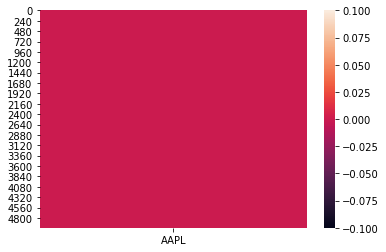

In [ ]:
sns.heatmap(apple.isnull()) #check for missing values for apple

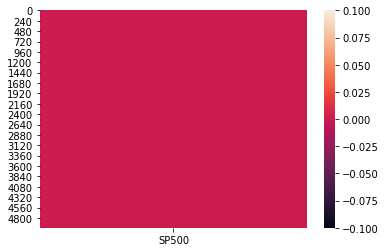

In [ ]:
sns.heatmap(sp500.isnull()) #check for missing values for s&p500 index

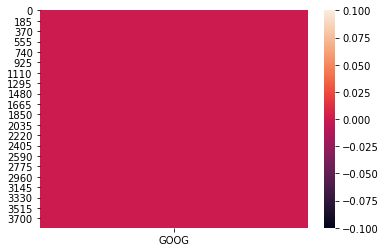

In [ ]:
sns.heatmap(google.isnull()) #check for google 

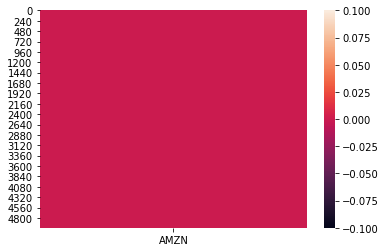

In [ ]:
sns.heatmap(amazon.isnull()) #check for Amazon

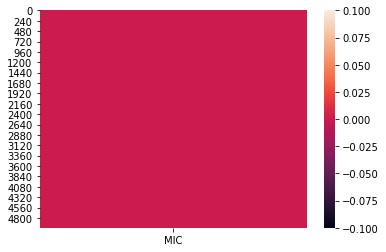

In [ ]:
sns.heatmap(microsoft.isnull()) #check for Microsoft


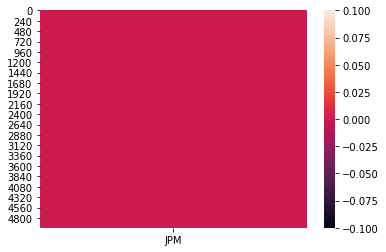

In [ ]:
sns.heatmap(jpm.isnull()) #CHECK FOR JPM

PLOT OF THE ADJUSTED CLOSING PRICES

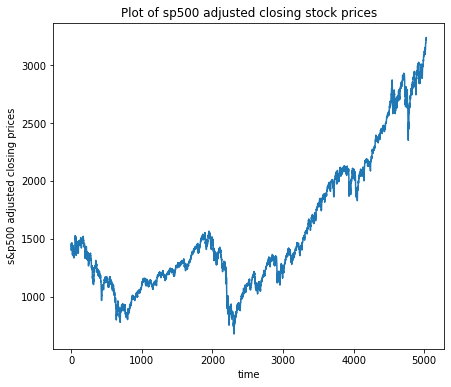

In [ ]:
##PLOT OF S&P 500 ADJUSTED CLOSING PRICES
sp500['SP500'].plot(label='SP500',figsize=(7,6))
plt.xlabel("time")
plt.ylabel("s&p500 adjusted closing prices")
plt.title('Plot of sp500 adjusted closing stock prices')
plt.show()

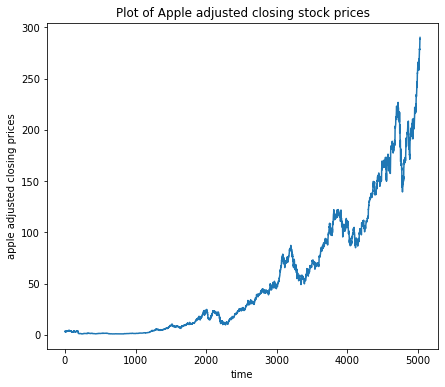

In [ ]:
##PLOT OF APPLE ADJUSTED CLOSING PRICES
apple['AAPL'].plot(label='APPLE',figsize=(7,6))
plt.xlabel("time")
plt.ylabel("apple adjusted closing prices")
plt.title('Plot of Apple adjusted closing stock prices')
plt.show()

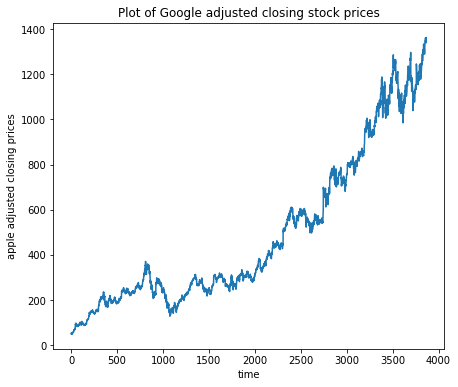

In [ ]:
##PLOT OF GOOGLE ADJUSTED CLOSING PRICES
google['GOOG'].plot(label='GOOGLE',figsize=(7,6))
plt.xlabel("time")
plt.ylabel("apple adjusted closing prices")
plt.title('Plot of Google adjusted closing stock prices')
plt.show()

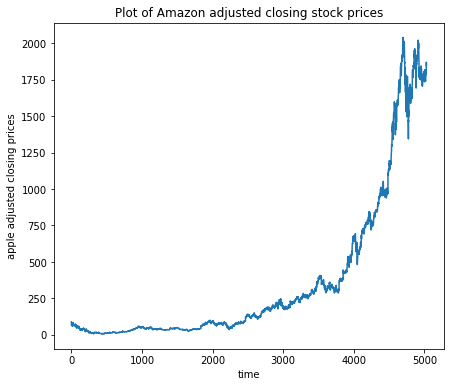

In [ ]:
##PLOT OF AMAZON ADJUSTED CLOSING PRICES
amazon['AMZN'].plot(label='AMAZON',figsize=(7,6))
plt.xlabel("time")
plt.ylabel("apple adjusted closing prices")
plt.title('Plot of Amazon adjusted closing stock prices')
plt.show()

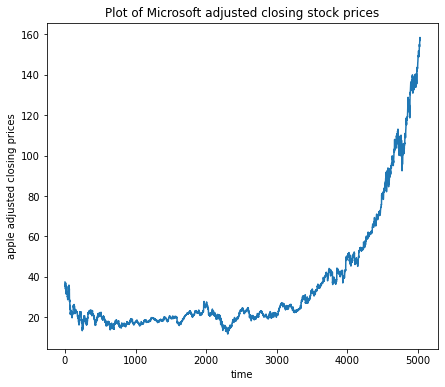

In [ ]:
##PLOT OF MICROSOFT ADJUSTED CLOSING PRICES
microsoft['MIC'].plot(label='MICROSOFT',figsize=(7,6))
plt.xlabel("time")
plt.ylabel("apple adjusted closing prices")
plt.title('Plot of Microsoft adjusted closing stock prices')
plt.show()

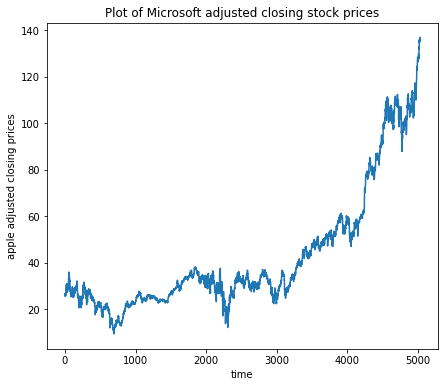

In [ ]:
##PLOT OF JPM ADJUSTED CLOSING PRICES
jpm['JPM'].plot(label='JPM',figsize=(7,6))
plt.xlabel("time")
plt.ylabel("apple adjusted closing prices")
plt.title('Plot of Microsoft adjusted closing stock prices')
plt.show()

CALCULATING AND PLOTTING RETURNS

0            NaN
1      -0.084310
2       0.014634
3      -0.086539
4       0.047368
          ...   
5025    0.016318
5026    0.000951
5027    0.019840
5028   -0.000380
5029    0.005935
Name: AAPL, Length: 5030, dtype: float64


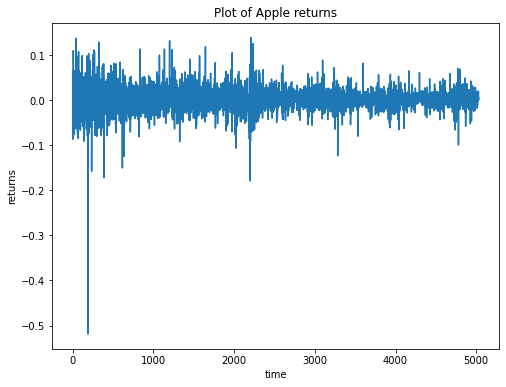

In [ ]:
#CALCULATE THE RETURNS OF APPLE AND PLOT 
apple_returns = apple['AAPL'] / apple['AAPL'] .shift(1) - 1 ##calculating the value of the returns
apple_returns.plot(figsize=(8, 6))        ##plotting of the returns
plt.xlabel("time")
plt.ylabel("returns")
plt.title('Plot of Apple returns')
print(apple_returns) #view the returns

0            NaN
1      -0.038345
2       0.001922
3       0.000956
4       0.027090
          ...   
5025    0.000866
5026   -0.000195
5027    0.005128
5028    0.000034
5029   -0.005781
Name: SP500, Length: 5030, dtype: float64


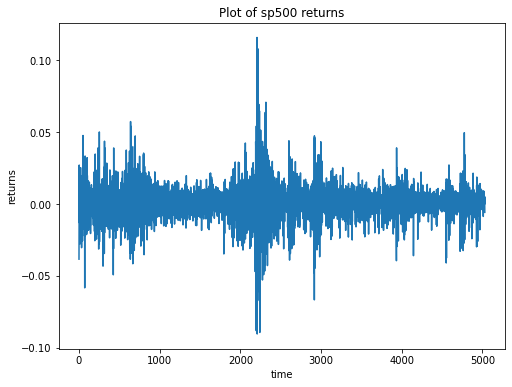

In [ ]:
#CALCULATE THE RETURNS OF S&P500 INDEX AND PLOT 
sp500_returns = sp500['SP500'] / sp500['SP500'].shift(1) - 1 ##calculating the value of the returns
sp500_returns.plot(figsize=(8, 6))        ##plotting of the returns
plt.xlabel("time")
plt.ylabel("returns")
plt.title('Plot of sp500 returns')
print(sp500_returns) #view the returns

0            NaN
1       0.079430
2       0.010064
3      -0.041408
4       0.010775
          ...   
3863   -0.000437
3864   -0.004590
3865    0.013418
3866   -0.005747
3867   -0.011021
Name: GOOG, Length: 3868, dtype: float64


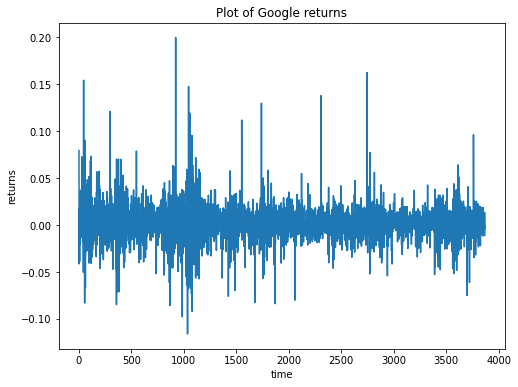

In [ ]:
#CALCULATE THE RETURNS OF GOOGLE AND PLOT 
google_returns = google['GOOG'] / google['GOOG'] .shift(1) - 1 ##calculating the value of the returns
google_returns.plot(figsize=(8, 6))        ##plotting of the returns
plt.xlabel("time")
plt.ylabel("returns")
plt.title('Plot of Google returns')
print(google_returns) #view the returns

0            NaN
1      -0.083217
2      -0.148741
3      -0.060036
4       0.061010
          ...   
5025    0.003638
5026   -0.002114
5027    0.044467
5028    0.000551
5029   -0.012253
Name: AMZN, Length: 5030, dtype: float64


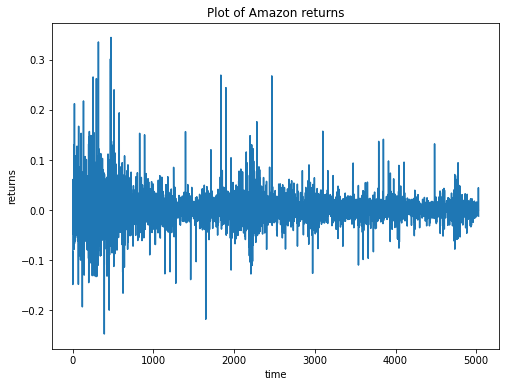

In [ ]:
#CALCULATE THE RETURNS OF AMAZON AND PLOT 
amazon_returns = amazon['AMZN'] / amazon['AMZN'] .shift(1) - 1 ##calculating the value of the returns
amazon_returns.plot(figsize=(8, 6))        ##plotting of the returns
plt.xlabel("time")
plt.ylabel("returns")
plt.title('Plot of Amazon returns')
print(amazon_returns) #view the returns

0            NaN
1      -0.033780
2       0.010544
3      -0.033498
4       0.013068
          ...   
5025    0.000000
5026   -0.000191
5027    0.008197
5028    0.001828
5029   -0.008619
Name: MIC, Length: 5030, dtype: float64


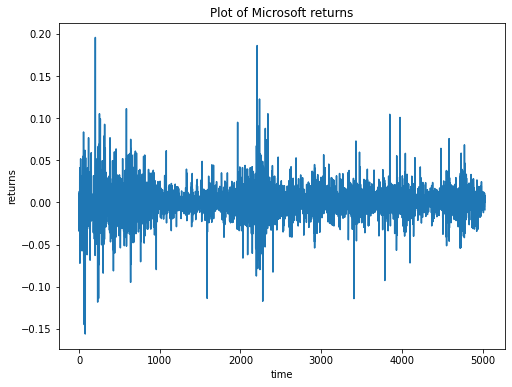

In [ ]:
#CALCULATE THE RETURNS OF MICROSOFT AND PLOT 
microsoft_returns = microsoft['MIC'] / microsoft['MIC'] .shift(1) - 1 ##calculating the value of the returns
microsoft_returns.plot(figsize=(8, 6))        ##plotting of the returns
plt.xlabel("time")
plt.ylabel("returns")
plt.title('Plot of Microsoft returns')
print(microsoft_returns) #view the returns

0            NaN
1      -0.019169
2      -0.006172
3       0.014197
4       0.018373
          ...   
5025   -0.000291
5026    0.002770
5027    0.010612
5028    0.000719
5029   -0.003665
Name: JPM, Length: 5030, dtype: float64


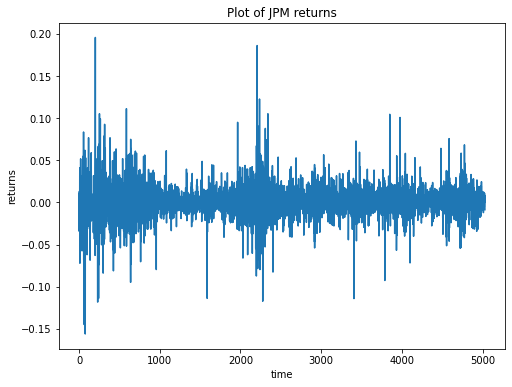

In [ ]:
#CALCULATE THE RETURNS OF JPM AND PLOT 
jpm_returns = jpm['JPM'] / jpm['JPM']  .shift(1) - 1 ##calculating the value of the returns
microsoft_returns.plot(figsize=(8, 6))        ##plotting of the returns
plt.xlabel("time")
plt.ylabel("returns")
plt.title('Plot of JPM returns')
print(jpm_returns) #view the returns

ASSIGN RETURNS TO VARIABLES


In [ ]:
Y = apple_returns[1:] #assign the target, Apple to Y
Z = amazon_returns[1:] #assign the target, Amazon to Z
G = google_returns[1:] #assign the target, Google to G
M = microsoft_returns[1:] #assign the target, Amazon o Z
X = sp500_returns[1:] #assign the feature, s&p500 index to X
J = jpm_returns[1:] #assign the feature, JPM to J
XG = sp500_returns[1163:]  #assign the sp500 data to be used for Google so we have the same dates and observations

AUTOCORRELATION PLOT

Text(0.5, 1.0, 'Autocorrelations of returns of Google')

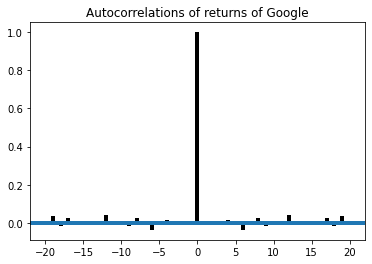

In [ ]:
plt.acorr(G, maxlags=20,lw=4)  #plotting the autocorelation for Google
plt.title('Autocorrelations of returns of Google')

Text(0.5, 1.0, 'Autocorrelations of returns of Amazon')

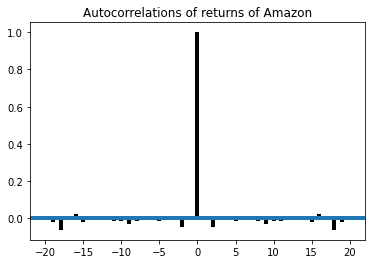

In [ ]:
plt.acorr(Z, maxlags=20,lw=4)  #plotting the autocorelation
plt.title('Autocorrelations of returns of Amazon')

Text(0.5, 1.0, 'Autocorrelations of returns of Microsoft')

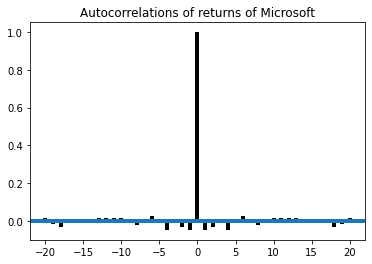

In [ ]:
plt.acorr(M, maxlags=20,lw=4)  #plotting the autocorelation
plt.title('Autocorrelations of returns of Microsoft')

Text(0.5, 1.0, 'Autocorrelations of returns of JPM')

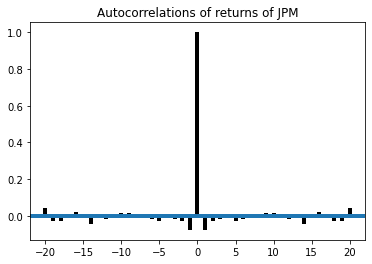

In [ ]:
plt.acorr(J, maxlags=20,lw=4)  #plotting the autocorelation
plt.title('Autocorrelations of returns of JPM')

Text(0.5, 1.0, 'Autocorrelations of returns of Apple')

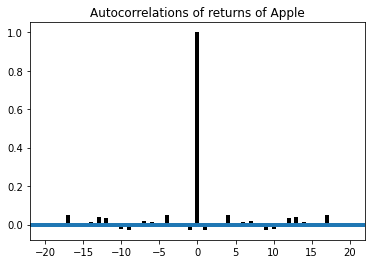

In [ ]:
plt.acorr(Y, maxlags=20,lw=4)  #plotting the autocorelation
plt.title('Autocorrelations of returns of Apple')

**MODEL 1 USING SCIKIT LEARN - LINEAR REGRESSION**

Reshape the values

In [ ]:
X =X.values.reshape(-1,1)
Y = Y.values.reshape(-1,1)
G = G.values.reshape(-1,1)
M = M.values.reshape(-1,1)
J = J.values.reshape(-1,1)
Z = Z.values.reshape(-1,1)
XG =XG.values.reshape(-1,1)

Splitting the data into 75% training and 25% testing

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)
X_train, X_test, Z_train, Z_test = train_test_split(X, Z, random_state=1)
X_train, X_test, J_train, J_test = train_test_split(X, J, random_state=1)
X_train, X_test, M_train, M_test = train_test_split(X, M, random_state=1)
XG_train, XG_test, G_train, G_test = train_test_split(XG, G, random_state=1)

In [ ]:
X_train  #view the feature train data

array([[ 0.01520834],
       [ 0.00034959],
       [-0.02929275],
       ...,
       [-0.00638153],
       [-0.00044977],
       [-0.00585286]])

In [ ]:
Y_test #view the target test data

array([[-0.00600211],
       [ 0.04202072],
       [ 0.01933364],
       ...,
       [ 0.02578706],
       [ 0.00323029],
       [-0.01587355]])

In [ ]:
#viewing the shapes of the training and testing data

print(X_train.shape)
print(Y_train.shape)
print(XG_train.shape)
print(G_train.shape)
print(Z_train.shape)
print(M_train.shape)
print(J_train.shape)
print(J_test.shape)
print(X_test.shape)
print(XG_test.shape)
print(G_test.shape)
print(Y_test.shape)
print(Z_test.shape)
print(M_test.shape)

(3771, 1)
(3771, 1)
(2900, 1)
(2900, 1)
(3771, 1)
(3771, 1)
(3771, 1)
(1258, 1)
(1258, 1)
(967, 1)
(967, 1)
(1258, 1)
(1258, 1)
(1258, 1)


## Linear Regression for Apple

In [ ]:
# setting the model
linreg = LinearRegression()

In [ ]:
# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# print the intercept and coefficients
print('The value of the intercept is ',linreg.intercept_[0])
print('The value of the coefficient is ', linreg.coef_[0])

The value of the intercept is  0.0010057143035787674
The value of the coefficient is  [1.16757073]


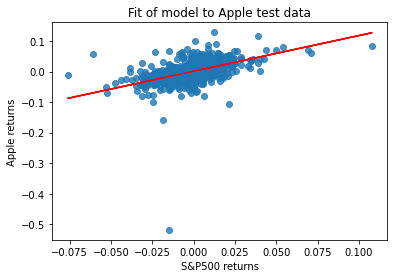

In [ ]:
#####This function plots the line of the fit obtained from the regression#####
##############################################################################
def regression_plot(x, y_pred, y):
    ## Plot the result
    sns.regplot(x, y, fit_reg=False)
    plt.plot(x, y_pred, c = 'red')
    plt.xlabel('S&P500 returns')
    plt.ylabel('Apple returns')
    plt.title('Fit of model to Apple test data')
    
 ##make predictions on the test data
Y_pred = linreg.predict(X_test)

regression_plot(X_test, Y_pred, Y_test)

In [ ]:
###This function returns the performance measures value for the regression using the inbuilt measures in sklearn##
##########################################################################################################3##
def metrics(y_actual, y_predicted, n_parameters):
    r2 = sklm.r2_score(y_actual, y_predicted) #computes the R^2 
    r2_adj = 1-((y_actual.shape[0] - 1)*(1 - r2)/(y_actual.shape[0]-n_parameters-1)) #computes the adjusted R^2 
    ## Print the metrics for the regression
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_actual, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_actual, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_actual, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_actual, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    
metrics(Y_test, Y_pred, 1)

Mean Square Error      = 0.0006270848268537914
Root Mean Square Error = 0.025041661822926036
Mean Absolute Error    = 0.014252782939048112
Median Absolute Error  = 0.009017570214672838
R^2                    = 0.2094457055661102
Adjusted R^2           = 0.20881628335716607


## Linear Regression for Amazon

In [ ]:
# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, Z_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# print the intercept and coefficients
print('The value of the intercept is ',linreg.intercept_[0])
print('The value of the coefficient is ', linreg.coef_[0])

The value of the intercept is  0.0011603894990251395
The value of the coefficient is  [1.29558822]


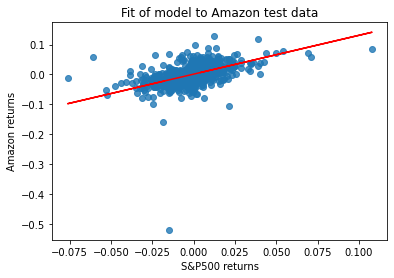

In [ ]:
def regression_plot(x, y_pred, y):
    ## Plot the result
    sns.regplot(x, y, fit_reg=False)
    plt.plot(x, y_pred, c = 'red')
    plt.xlabel('S&P500 returns')
    plt.ylabel('Amazon returns')
    plt.title('Fit of model to Amazon test data')

Z_pred = linreg.predict(X_test) 

regression_plot(X_test, Z_pred, Y_test)

In [ ]:
##view the metrics
metrics(Z_test, Z_pred, 1) 

Mean Square Error      = 0.0007454694573588086
Root Mean Square Error = 0.027303286566983262
Mean Absolute Error    = 0.016406518338403103
Median Absolute Error  = 0.00963203705722246
R^2                    = 0.2740669889603019
Adjusted R^2           = 0.2734890168177544


## Linear Regression for Microsoft

In [ ]:
# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, M_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# print the intercept and coefficients
print('The value of the intercept is ',linreg.intercept_[0])
print('The value of the coefficient is ', linreg.coef_[0])

The value of the intercept is  0.0002046338511828779
The value of the coefficient is  [1.07939803]


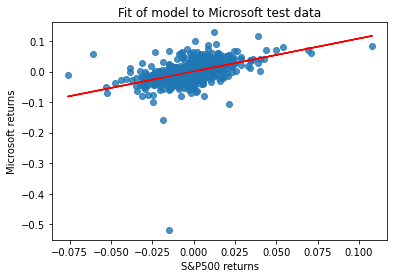

In [ ]:
def regression_plot(x, y_pred, y):
    ## Plot the result
    sns.regplot(x, y, fit_reg=False)
    plt.plot(x, y_pred, c = 'red')
    plt.xlabel('S&P500 returns')
    plt.ylabel('Microsoft returns')
    plt.title('Fit of model to Microsoft test data')

#make predictions on test data
M_pred = linreg.predict(X_test) 

regression_plot(X_test, M_pred, Y_test)

In [ ]:
metrics(M_test, M_pred, 1) 

Mean Square Error      = 0.00019910279080349804
Root Mean Square Error = 0.014110378832742161
Mean Absolute Error    = 0.008786505892626906
Median Absolute Error  = 0.005655075382369966
R^2                    = 0.47281301253414354
Adjusted R^2           = 0.4723932776715115


## Linear Regression for JPM

In [ ]:
# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, J_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# print the intercept and coefficients
print('The value of the intercept is ',linreg.intercept_[0])
print('The value of the coefficient is ', linreg.coef_[0])

The value of the intercept is  0.0003473060127398728
The value of the coefficient is  [1.54134111]


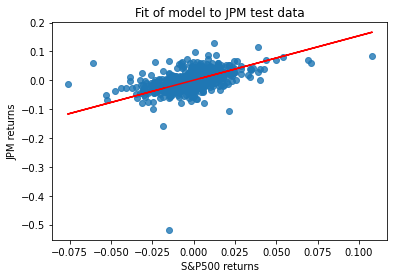

In [ ]:
def regression_plot(x, y_pred, y):
    ## Plot the result
    sns.regplot(x, y, fit_reg=False)
    plt.plot(x, y_pred, c = 'red')
    plt.xlabel('S&P500 returns')
    plt.ylabel('JPM returns')
    plt.title('Fit of model to JPM test data')

#predict on test data
J_pred = linreg.predict(X_test) 

regression_plot(X_test, J_pred, Y_test)

In [ ]:
metrics(J_test, J_pred, 1) 

Mean Square Error      = 0.00022640313639076556
Root Mean Square Error = 0.015046698521295811
Mean Absolute Error    = 0.0099463115688925
Median Absolute Error  = 0.006709605711380541
R^2                    = 0.5782954194511432
Adjusted R^2           = 0.577959667396566


#Linear regression for Google

In [ ]:
# fit the model to the training data (learn the coefficients)
linreg.fit(XG_train, G_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# print the intercept and coefficients
print('The value of the intercept is ',linreg.intercept_[0])
print('The value of the coefficient is ', linreg.coef_[0])

The value of the intercept is  0.00039056320395666896
The value of the coefficient is  [0.95726942]


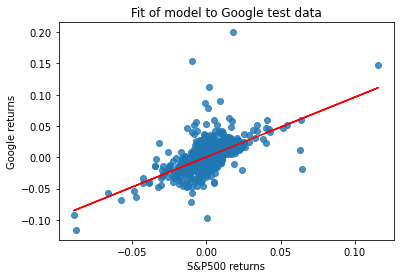

In [ ]:
def regression_plot(x, y_pred, y):
    ## Plot the result
    sns.regplot(x, y, fit_reg=False)
    plt.plot(x, y_pred, c = 'red')
    plt.xlabel('S&P500 returns')
    plt.ylabel('Google returns')
    plt.title('Fit of model to Google test data')

#predict on test data
G_pred = linreg.predict(XG_test)
 
regression_plot(XG_test, G_pred, G_test)

In [ ]:
metrics(G_test, G_pred, 1) 

Mean Square Error      = 0.00029140608609270726
Root Mean Square Error = 0.017070620553826018
Mean Absolute Error    = 0.010119691405792096
Median Absolute Error  = 0.006286641197486781
R^2                    = 0.35680846234017116
Adjusted R^2           = 0.35614194261202636


 LASSO REGRESSION IN SCIKIT LEARN

LASSO FOR APPLE

In [ ]:
classo = linear_model.Lasso() #initialise the model

In [ ]:
classo.fit(X_train, Y_train) #fit the model to the training data

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
print('The value of the intercept is ',classo.intercept_[0])
print('The value of the coefficient is ', classo.coef_[0])

The value of the intercept is  0.0013602033618806924
The value of the coefficient is  0.0


In [ ]:
Y_pred = classo.predict(X_test) #predicting on the testing data

In [ ]:
###print of the metrics for the regression
metrics(Y_test, Y_pred, 1) 

Mean Square Error      = 0.0007935408001221653
Root Mean Square Error = 0.028169856231833438
Mean Absolute Error    = 0.017111673267965553
Median Absolute Error  = 0.011615361137047253
R^2                    = -0.00040227490841560076
Adjusted R^2           = -0.001198773534935027


LASSO FOR AMAZON

In [ ]:
classo.fit(X_train, Z_train) #fit the model to the training data

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
print('The value of the intercept is ',classo.intercept_[0])
print('The value of the coefficient is ', classo.coef_[0])

The value of the intercept is  0.0015537462669037209
The value of the coefficient is  0.0


In [ ]:
Z_pred = classo.predict(X_test) #predicting on the testing data

In [ ]:
###print of the metrics for the regression
metrics(Z_test, Z_pred, 1) 

Mean Square Error      = 0.0010297474068844343
Root Mean Square Error = 0.032089677575264514
Mean Absolute Error    = 0.020761704923979975
Median Absolute Error  = 0.013250881460730857
R^2                    = -0.0027609157032697507
Adjusted R^2           = -0.003559292228511257


LASSO FOR MICROSOFT

In [ ]:
classo.fit(X_train, M_train) #fit the model to the training data

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
print('The value of the intercept is ',classo.intercept_[0])
print('The value of the coefficient is ', classo.coef_[0])

The value of the intercept is  0.000532352577747525
The value of the coefficient is  0.0


In [ ]:
M_pred = classo.predict(X_test) #predicting on the testing data

In [ ]:
###print of the metrics for the regression
metrics(M_test, M_pred, 1) 

Mean Square Error      = 0.00037774127520004354
Root Mean Square Error = 0.01943556727240148
Mean Absolute Error    = 0.012712252957482292
Median Absolute Error  = 0.008252615995589963
R^2                    = -0.00018831534491625668
Adjusted R^2           = -0.0009846436214646648


LASSO FOR JPM

In [ ]:
classo.fit(X_train, J_train) #fit the model to the training data

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
print('The value of the intercept is ',classo.intercept_[0])
print('The value of the coefficient is ', classo.coef_[0])

The value of the intercept is  0.0008152764270428599
The value of the coefficient is  0.0


In [ ]:
##PREDICT ON TEST DATA
J_pred = classo.predict(X_test) 

In [ ]:
###print of the metrics for the regression
metrics(J_test, J_pred, 1) 

Mean Square Error      = 0.0005374989772669595
Root Mean Square Error = 0.023184024181900766
Mean Absolute Error    = 0.014640643811298705
Median Absolute Error  = 0.009141696411041345
R^2                    = -0.001160073871873557
Adjusted R^2           = -0.0019571758415166673


LASSO FOR GOOGLE

In [ ]:
classo.fit(XG_train, G_train) #fit the model to the training data

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
print('The value of the intercept is ',classo.intercept_[0])
print('The value of the coefficient is ', classo.coef_[0])

The value of the intercept is  0.0007132595927872781
The value of the coefficient is  0.0


In [ ]:
##PREDICT ON TEST DATA
G_pred = classo.predict(XG_test) 

In [ ]:
###print of the metrics for the regression
metrics(G_test, G_pred, 1) 

Mean Square Error      = 0.00045462358483996755
Root Mean Square Error = 0.021321903874653585
Mean Absolute Error    = 0.01366774693713158
Median Absolute Error  = 0.009283692352000265
R^2                    = -0.003445214581467848
Adjusted R^2           = -0.004485054182070458


RIDGE REGRESSION IN SCIKIT LEARN

RIDGE REGRESSION FOR APPLE

In [ ]:
cridge = linear_model.Ridge() #initialise the model

In [ ]:
cridge.fit(X_train, Y_train) #fit the model on the training data

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
print('The value of the intercept is ',cridge.intercept_[0])
print('The value of the coefficient is ', cridge.coef_[0])

The value of the intercept is  0.0012388256650839172
The value of the coefficient is  [0.39977834]


In [ ]:
Y_pred = cridge.predict(X_test) #predict on test data

In [ ]:
###print of the metrics for the regression
metrics(Y_test, Y_pred, 1) 

Mean Square Error      = 0.000690140476011973
Root Mean Square Error = 0.02627052485223645
Mean Absolute Error    = 0.015416705530642163
Median Absolute Error  = 0.010210385239917569
R^2                    = 0.12995260974298362
Adjusted R^2           = 0.1292598968526516


RIDGE REGRESSION TO AMAZON

In [ ]:
cridge.fit(X_train, Z_train) #fit the model on the training data

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
print('The value of the intercept is ',cridge.intercept_[0])
print('The value of the coefficient is ', cridge.coef_[0])

The value of the intercept is  0.0014190601958209263
The value of the coefficient is  [0.44361176]


In [ ]:
Z_pred = cridge.predict(X_test)   #make predictions on the test data

In [ ]:
metrics(Z_test, Z_pred, 1) 

Mean Square Error      = 0.0008752705454837958
Root Mean Square Error = 0.02958497161539615
Mean Absolute Error    = 0.018589461226508258
Median Absolute Error  = 0.011683047721610329
R^2                    = 0.14766758545872027
Adjusted R^2           = 0.14698897684841672


RIDGE REGRESSION FOR MICROSOFT

In [ ]:
cridge.fit(X_train, M_train) #fit the model on the training data

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
print('The value of the intercept is ',cridge.intercept_[0])
print('The value of the coefficient is ', cridge.coef_[0])

The value of the intercept is  0.0004201410911134028
The value of the coefficient is  [0.36958785]


In [ ]:
M_pred = cridge.predict(X_test)  #make predictions on the test data

In [ ]:
metrics(M_test, M_pred, 1) 

Mean Square Error      = 0.0002769138952565832
Root Mean Square Error = 0.016640730009725633
Mean Absolute Error    = 0.010747198938499571
Median Absolute Error  = 0.007013841643661618
R^2                    = 0.2667837470353077
Adjusted R^2           = 0.26619997613326574


RIDGE REGRESSION FOR JPM

In [ ]:
cridge.fit(X_train, J_train) #fit the model on the training data

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
print('The value of the intercept is ',cridge.intercept_[0])
print('The value of the coefficient is ', cridge.coef_[0])

The value of the intercept is  0.000655042508034983
The value of the coefficient is  [0.52775799]


In [ ]:
J_pred = cridge.predict(X_test)  #make predictions on the test data

In [ ]:
metrics(J_test, J_pred, 1) 

Mean Square Error      = 0.0003501067558657875
Root Mean Square Error = 0.018711139886863855
Mean Absolute Error    = 0.01167656885062507
Median Absolute Error  = 0.007330635488036024
R^2                    = 0.3478817255655081
Adjusted R^2           = 0.34736252311771


RIDGE REGRESSION FOR GOOGLE

In [ ]:
cridge.fit(XG_train, G_train) #fit the model on the training data

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
print('The value of the intercept is ',cridge.intercept_[0])
print('The value of the coefficient is ', cridge.coef_[0])

The value of the intercept is  0.0006296645321656824
The value of the coefficient is  [0.24798231]


In [ ]:
G_pred = cridge.predict(XG_test)  #make predictions on the test data

In [ ]:
metrics(G_test, G_pred, 1) 

Mean Square Error      = 0.0003830989118016286
Root Mean Square Error = 0.019572912706126
Mean Absolute Error    = 0.012380526959508436
Median Absolute Error  = 0.0084354021343451
R^2                    = 0.1544240497464915
Adjusted R^2           = 0.1535478052384568


ELASTIC NET REGRESSION

ELASTIC NET FOR APPLE

In [ ]:
Enet = linear_model.ElasticNet() #initialise the model

In [ ]:
Enet.fit(X_train, Y_train) #fit the model on the training data

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
print('The value of the intercept is ',Enet.intercept_[0])
print('The value of the coefficient is ', Enet.coef_[0])

The value of the intercept is  0.0013602033618806924
The value of the coefficient is  0.0


In [ ]:
Y_pred = Enet.predict(X_test) #make predictions on test data


In [ ]:
metrics(Y_test, Y_pred, 1) #check metrics

Mean Square Error      = 0.0007935408001221653
Root Mean Square Error = 0.028169856231833438
Mean Absolute Error    = 0.017111673267965553
Median Absolute Error  = 0.011615361137047253
R^2                    = -0.00040227490841560076
Adjusted R^2           = -0.001198773534935027


ELASTIC NET FOR AMAZON

In [ ]:
Enet.fit(X_train, Z_train) #fit the model on the training data

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
print('The value of the intercept is ',Enet.intercept_[0])
print('The value of the coefficient is ', Enet.coef_[0])

The value of the intercept is  0.0015537462669037209
The value of the coefficient is  0.0


In [ ]:
Z_pred = Enet.predict(X_test) #make predictions on test data

In [ ]:
metrics(Z_test, Z_pred, 1) 

Mean Square Error      = 0.0010297474068844343
Root Mean Square Error = 0.032089677575264514
Mean Absolute Error    = 0.020761704923979975
Median Absolute Error  = 0.013250881460730857
R^2                    = -0.0027609157032697507
Adjusted R^2           = -0.003559292228511257


ELASTIC NET FOR MICROSOFT

In [ ]:
Enet.fit(X_train, M_train) #fit the model on the training data

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
print('The value of the intercept is ',Enet.intercept_[0])
print('The value of the coefficient is ', Enet.coef_[0])

The value of the intercept is  0.000532352577747525
The value of the coefficient is  0.0


In [ ]:
M_pred = Enet.predict(X_test) #make predictions on test data

In [ ]:
metrics(M_test, M_pred, 1) 

Mean Square Error      = 0.00037774127520004354
Root Mean Square Error = 0.01943556727240148
Mean Absolute Error    = 0.012712252957482292
Median Absolute Error  = 0.008252615995589963
R^2                    = -0.00018831534491625668
Adjusted R^2           = -0.0009846436214646648


ELASTIC NET FOR JPM

In [ ]:
Enet.fit(X_train, J_train) #fit the model on the training data

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
print('The value of the intercept is ',Enet.intercept_[0])
print('The value of the coefficient is ', Enet.coef_[0])

The value of the intercept is  0.0008152764270428599
The value of the coefficient is  0.0


In [ ]:
J_pred = Enet.predict(X_test) #make predictions on test data

In [ ]:
metrics(J_test, J_pred, 1) 

Mean Square Error      = 0.0005374989772669595
Root Mean Square Error = 0.023184024181900766
Mean Absolute Error    = 0.014640643811298705
Median Absolute Error  = 0.009141696411041345
R^2                    = -0.001160073871873557
Adjusted R^2           = -0.0019571758415166673


ELASTIC NET FOR GOOGLE

In [ ]:
Enet.fit(XG_train, G_train) #fit the model on the training data

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
print('The value of the intercept is ',Enet.intercept_[0])
print('The value of the coefficient is ', Enet.coef_[0])

The value of the intercept is  0.0007132595927872781
The value of the coefficient is  0.0


In [ ]:
G_pred = Enet.predict(XG_test)  #make predictions on test data

In [ ]:
metrics(G_test, G_pred, 1) 

Mean Square Error      = 0.00045462358483996755
Root Mean Square Error = 0.021321903874653585
Mean Absolute Error    = 0.01366774693713158
Median Absolute Error  = 0.009283692352000265
R^2                    = -0.003445214581467848
Adjusted R^2           = -0.004485054182070458
